In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
db = pd.read_csv('НД-без-пополнения.csv')
x = db.loc[:,'Electronegativity':'Density (g/cm3)'].values
y = db.loc[:,'Viability (%)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes=70, criterion='squared_error', max_depth=10, min_samples_leaf=1, min_samples_split=2, max_features='sqrt', splitter='best')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Accuracy of Model with Cross Validation is: -8.956617792911546
r2_score: 0.5441042303996406
Mean Absolute Error: 9.227437854248613
Mean Squared Error: 155.03333040359598
Root Mean Squared Error: 12.451238107256483
DecisionTreeRegressor(max_depth=10, max_features='sqrt', max_leaf_nodes=70)
r_score: 0.7376342117876858


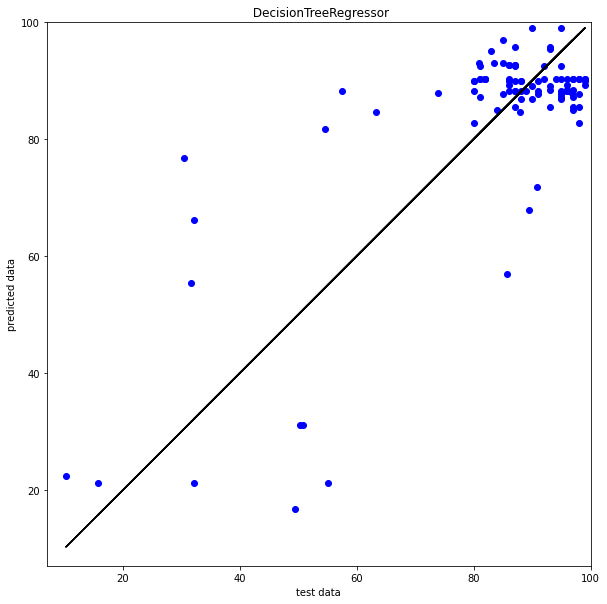

In [20]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Accuracy of Model with Cross Validation is:",accuracy.mean())
#metrics

from sklearn import metrics
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

f, dx = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title(' DecisionTreeRegressor')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(7, 100)
plt.ylim(7, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
db = pd.read_csv('Новые дескрипторы усреднённые.csv')
x = db.loc[:,'Electronegativity':'Density (g/cm3)'].values
y = db.loc[:,'Newtox'].values

In [ ]:
std_slc = StandardScaler()

In [ ]:
pca = decomposition.PCA()

In [ ]:
dtreeReg = tree.DecisionTreeRegressor()

In [ ]:
pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("dtreeReg", dtreeReg)])

In [ ]:
n_components = list(range(1,x.shape[1]+1,1))

In [ ]:
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dtreeReg__criterion=criterion,
                      dtreeReg__max_depth=max_depth)

In [ ]:
clf = GridSearchCV(pipe, parameters)
clf.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dtreeReg', DecisionTreeRegressor())]),
             param_grid={'dtreeReg__criterion': ['friedman_mse', 'mse'],
                         'dtreeReg__max_depth': [4, 6, 8, 10],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17,
                                               18]})

In [ ]:
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])
CV_Result = cross_val_score(clf, x, y, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: 15

DecisionTreeRegressor(criterion='mse', max_depth=10)

[ 0.05937917 -0.09970393 -4.48447644]

-1.508267068784251

2.1054997069212606
